LogyCo

In [1]:
import random

def find_hamiltonian_cycle(distance, visit_city, curr_pos, cities, count, cost, hamiltonian_cycle, path, final_path):
    # Base case: if all cities have been visited
    if count == cities:
        if cost < hamiltonian_cycle:
            hamiltonian_cycle = cost
            final_path.clear()
            final_path.extend(path)
        return hamiltonian_cycle

    # Backtracking
    for i in range(cities):
        if not visit_city[i] and distance[curr_pos][i] > 0:
            visit_city[i] = True
            path.append(i+1)
            hamiltonian_cycle = find_hamiltonian_cycle(distance, visit_city, i, cities, count + 1, cost + distance[curr_pos][i], hamiltonian_cycle, path, final_path)
            visit_city[i] = False
            path.pop()
    
    return hamiltonian_cycle


# Ingreso de la Matriz de Adyacencia
cities = 0
with open('distance_matrix.txt', 'r') as file:
    cities = int(file.readline().strip())

# 10% Aproximado de probabilidad de que haya una ciudad con derrumbe.
cont_derr = 0
derrumbe = 10  # 10% probabilidad derrumbe
noderrumbe = 90  # 90% probabilidad no derrumbe
total = derrumbe + noderrumbe
# Se encuentra una cantidad contDerr de derrumbes.
for _ in range(cities):
    calculo = random.randint(1, total)
    if calculo > noderrumbe:
        cont_derr += 1
print("Cantidad de derrumbes:", cont_derr)

# Ingreso de la matriz de adyacencia original y sin modificaciones
distance = []
with open('distance_matrix.txt', 'r') as file:
    file.readline()  # Saltar la primera línea
    for _ in range(cities):
        row = list(map(int, file.readline().strip().split()))
        distance.append(row)

# IMPRESIÓN DE LA MATRIZ DE ADYACENCIA ORIGINAL (P R U E B A)
for row in distance:
    print(" ".join(map(str, row)))

# Decisión de columnas y filas a eliminar de forma aleatoria
# partiendo de la cantidad de derrumbes generada previamente
print("Ciudades removidas:")
new_cities = cities
temp1 = distance  # en esta matriz se guardará la nueva matriz
for _ in range(cont_derr):  # se repetirá el proceso de eliminación de ciudad un total de contDerr veces.
    row_col_to_remove = random.randint(1, new_cities)
    temp = [[0] * (new_cities - 1) for _ in range(new_cities - 1)]  # se crea una nueva temporal para que no cree interferencias con la matriz original.
    temp_row = 0
    for r in range(new_cities):
        if r == row_col_to_remove - 1:
            continue
        temp_col = 0
        for c in range(new_cities):
            if c == row_col_to_remove - 1:
                continue
            temp[temp_row][temp_col] = temp1[r][c]
            temp_col += 1
        temp_row += 1

    new_cities -= 1
    temp1 = temp
    print(row_col_to_remove)

print("Resultante de eliminar ciudades inaccesibles:")
# IMPRESIÓN MATRIZ MODIFICADA
for row in temp1:
    print(" ".join(map(str, row)))

# Implementación ciudades con llovizna
# Cálculo (CANTIDAD) basándose en posibilidad de lluvia en ciudades (20%)
cont_lluvia = 0
nolluvia = 80  # Posibilidad de que no llueva = 80%
for _ in range(new_cities):
    calculo = random.randint(1, total)
    if calculo > nolluvia:
        cont_lluvia += 1

if cont_lluvia > 1:
    print("Va a llover en", cont_lluvia, "ciudades.")
elif cont_lluvia == 0:
    print("No se presentaron lluvias.")
elif cont_lluvia == 1:
    print("Va a llover en una ciudad.")

# Cambio de pesos
for _ in range(cont_lluvia):
    rand_col = random.randint(0, new_cities - 1)  # Generación de random entre 0 y la cantidad de ciudades
    rand_row = random.randint(0, new_cities - 1)  # Generación de random entre 0 y la cantidad de ciudades
    cambio = temp1[rand_row][rand_col]  # Se guarda el contenido de la matriz en las posiciones generadas
    doble = cambio * 2
    random_val = random.randint(cambio, doble)  # Generación de un random entre el valor y su doble
    temp1[rand_row][rand_col] = random_val  # Se cambia la variable por el random previamente generado
    cor_row = rand_row + 1  # Por facilidad a la hora de leer el nodo eliminado se le suma un 1 a una variable temporal
    cor_col = rand_col + 1
    print("El camino", cor_row, ",", cor_col, "tendrá un cambio a:")
    print(temp1[rand_row][rand_col])

print()
print("Resultante de modificar ciudades con lluvia.")
for row in temp1:
    print(" ".join(map(str, row)))

visit_city = [False] * cities
visit_city[0] = True
hamiltonian_cycle = float('inf')
path = [1]
final_path = []
hamiltonian_cycle = find_hamiltonian_cycle(temp1, visit_city, 0, new_cities, 1, 0, hamiltonian_cycle, path, final_path)
print()
print("Tiempo en minutos:", hamiltonian_cycle)
print("Camino Óptimo:", final_path)
dias = (hamiltonian_cycle // 60 // 8) + 1
print("Días gastados:", dias)

Cantidad de derrumbes: 1
0 360 620 780 364 782 989 255 679 857
345 0 345 568 1005 235 345 1000000 1000 10
345 979 0 345 3462 957 346 846 1367 129
886 371 998 0 1000000 849 264 547 457 999
1000000 346 50 351 0 968 978 989 929 857
385 925 858 253 878 246 936 979 236 767
346 968 683 346 234 1000000 825 965 468 126
2356 468 468 8348 295 238 969 284 858 365
878 949 235 768 978 235 927 948 948 939
457 349 268 2385 685 939 828 969 238 867
Ciudades removidas:
8
Resultante de eliminar ciudades inaccesibles:
0 360 620 780 364 782 989 679 857
345 0 345 568 1005 235 345 1000 10
345 979 0 345 3462 957 346 1367 129
886 371 998 0 1000000 849 264 457 999
1000000 346 50 351 0 968 978 929 857
385 925 858 253 878 246 936 236 767
346 968 683 346 234 1000000 825 468 126
878 949 235 768 978 235 927 948 939
457 349 268 2385 685 939 828 238 867
Va a llover en una ciudad
La el camino 8 , 4 tendrá un cambio a:
1108

Resultante de modificar ciudades con lluvia.
0 360 620 780 364 782 989 679 857
345 0 345 568 100

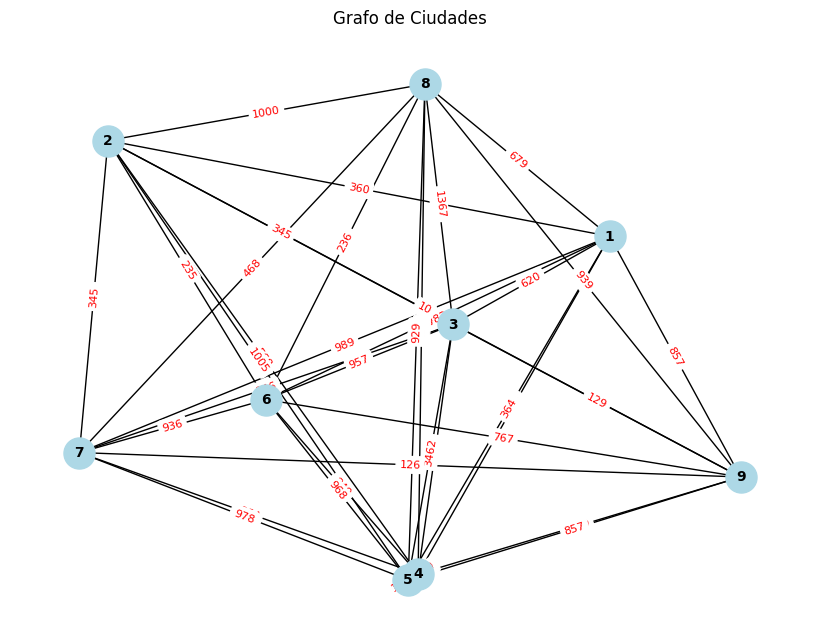

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def print_graph(distance_matrix):
    G = nx.Graph()

    # Agregar nodos al grafo
    cities = len(distance_matrix)
    G.add_nodes_from(range(1, cities + 1))

    # Agregar aristas al grafo
    for i in range(cities):
        for j in range(i + 1, cities):
            weight = distance_matrix[i][j]
            if weight > 0:
                G.add_edge(i + 1, j + 1, weight=weight)

    # Obtener posición de los nodos para visualización
    pos = nx.spring_layout(G)

    # Obtener los pesos de las aristas
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

    # Mostrar el grafo
    plt.title('Grafo de Ciudades')
    plt.axis('off')
    plt.show()

# Utilizar la matriz de distancia modificada :)
print_graph(temp1)

In [1]:
import tkinter as tk
from tkinter import ttk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Función para convertir la matriz de distancia original a la matriz de distancia modificada
def convert_distance_matrix(distance, contDerr, contLluvia):
    cities = len(distance)
    newcities = cities - contDerr

    # Crear la matriz de distancia modificada
    temp1 = [[0] * newcities for _ in range(newcities)]

    # Copiar los valores de la matriz original a la matriz modificada, omitiendo las filas y columnas eliminadas
    temprow = 0
    for r in range(cities):
        if r + 1 in removed_cities:
            continue
        tempcol = 0
        for c in range(cities):
            if c + 1 in removed_cities:
                continue
            temp1[temprow][tempcol] = distance[r][c]
            tempcol += 1
        temprow += 1

    # Realizar cambios en los pesos para las ciudades con lluvia
    for _ in range(contLluvia):
        randCol = rand.randint(0, newcities - 1)
        randRow = rand.randint(0, newcities - 1)
        cambio = temp1[randRow][randCol]
        doble = cambio * 2
        random = rand.randint(cambio, doble)
        temp1[randRow][randCol] = random

    return temp1

# Función para mostrar el gráfico en la GUI
def print_graph(distance_matrix):
    G = nx.Graph()

    # Agregar nodos al grafo
    cities = len(distance_matrix)
    G.add_nodes_from(range(1, cities + 1))

    # Agregar aristas al grafo
    for i in range(cities):
        for j in range(i + 1, cities):
            weight = distance_matrix[i][j]
            if weight > 0:
                G.add_edge(i + 1, j + 1, weight=weight)

    # Obtener posición de los nodos para visualización
    pos = nx.spring_layout(G)

    # Obtener los pesos de las aristas
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Dibujar el grafo
    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

    # Convertir la figura de Matplotlib a un objeto Tkinter
    canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Función para mostrar el resultado en la GUI
def show_result(hamiltonian_cycle, final_path, dias):
    result_text.config(state=tk.NORMAL)
    result_text.delete('1.0', tk.END)
    result_text.insert(tk.END, "Tiempo en minutos: {}\nCamino Óptimo: {}\nDías gastados: {}".format(hamiltonian_cycle, final_path, dias))
    result_text.config(state=tk.DISABLED)

# Función para manejar el evento del botón "Mostrar Gráfico"
def show_graph():
    result_text.config(state=tk.NORMAL)
    result_text.delete('1.0', tk.END)

    # Convertir la matriz de distancia original a la matriz de distancia modificada
    distance_matrix = convert_distance_matrix(distance, contDerr, contLluvia)

    # Mostrar el gráfico en la GUI
    print_graph(distance_matrix)

    # Realizar los cálculos necesarios para obtener el resultado
    # ...

    # Mostrar el resultado en la GUI
    show_result(hamiltonian_cycle, final_path, dias)

# Crear ventana principal
root = tk.Tk()
root.title("Visualización del Grafo")

# Crear un marco para el gráfico
graph_frame = ttk.Frame(root)
graph_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Crear un marco para el resultado
result_frame = ttk.Frame(root)
result_frame.pack(side=tk.TOP, padx=10, pady=10)

# Crear una etiqueta para el resultado
result_label = ttk.Label(result_frame, text="Resultado:")
result_label.pack(side=tk.TOP, anchor=tk.W)

# Crear un cuadro de texto para mostrar el resultado
result_text = tk.Text(result_frame, height=6, state=tk.DISABLED)
result_text.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Crear un botón para mostrar el gráfico
show_graph_button = ttk.Button(root, text="Mostrar Gráfico", command=show_graph)
show_graph_button.pack(side=tk.TOP, pady=10)

# Variables de ejemplo
distance = [[0, 2, 9, 10],
            [2, 0, 6, 4],
            [9, 6, 0, 8],
            [10, 4, 8, 0]]
contDerr = 2
contLluvia = 1
removed_cities = [2, 4]
hamiltonian_cycle = 30
final_path = [1, 3, 4, 2]
dias = 2

# Mostrar el gráfico y el resultado inicial en la GUI
show_graph()
show_result(hamiltonian_cycle, final_path, dias)

# Iniciar el bucle de eventos de la GUI
root.mainloop()


NameError: name 'rand' is not defined